In [1]:
import csv
from tkinter import *
import matplotlib.pyplot as plt

In [2]:
###############################################
# button tính điểm trung bình môn
def DiemTrungBinhMon(mon):
    diem_thi = []
    for diem in mon:
        if float(diem) >= 0:
            diem_thi.append(float(diem))
    return sum(diem_thi)/len(diem_thi)

def DiemTrungBinh(diem_cac_mon, ten_mon):
    trung_binh = {}
    for i in range(len(ten_mon)):
        trung_binh[ten_mon[i]] = DiemTrungBinhMon(diem_cac_mon[i])
#     print(trung_binh)
    return trung_binh

def BT1(diem_cac_mon, ten_mon):
    global bien1
    bien1 = '1'
    trung_binh = DiemTrungBinh(diem_cac_mon, ten_mon)
    tex.delete('1.0', 'end')
    for i in trung_binh:
        tex.insert(INSERT, f"{i}: {trung_binh[i]}\n")

###############################################
# button tính số lượng thí sinh không tham gia thi
def ThiSinhKhongThiMon(mon):
    khong_thi = mon.count('-1')
    return khong_thi

def ThiSinhKhongThi(diem_cac_mon, ten_mon):
    khong_thi = {}
    for i in range(len(ten_mon)):
        khong_thi[ten_mon[i]] = ThiSinhKhongThiMon(diem_cac_mon[i])
    return khong_thi

def BT4(diem_cac_mon, ten_mon):
    global bien1
    bien1 = '4'
    khong_thi = ThiSinhKhongThi(diem_cac_mon, ten_mon)
    tex.delete('1.0', 'end')
    for i in khong_thi:
        tex.insert(INSERT, f"{i}: {khong_thi[i]}\n")
        
###############################################
# button tính ngày sinh của các thí sinh
def NamSinh(ngay_sinh):
    nam_sinh = {}
    for i in ngay_sinh:
        ns = i[-4:]
        nam_sinh[ns] = nam_sinh.get(ns, 0) + 1
    return nam_sinh

def BT3(ngay_sinh):
    global bien1 
    bien1 = '3'
    nam_sinh = NamSinh(ngay_sinh)
    tex.delete('1.0', 'end')
    for i in nam_sinh:
        tex.insert(INSERT, f"{i}: {nam_sinh[i]}\n")

################################################
def TinhDiem(Mon):
    try:
        diem_min, diem_max = so_diem.get().split(':')
        diem_min, diem_max = float(diem_min), float(diem_max)
        return list(filter(lambda x: (float(x) >= diem_min and float(x) <= diem_max), Mon))
    except:
        return []
            
def TinhDiemCacMon(diem_cac_mon, ten_mon):
    tinh_diem = {}
    for i in range(len(ten_mon)):
        so_luong = TinhDiem(diem_cac_mon[i])
        tinh_diem[ten_mon[i]] = len(so_luong)
    return tinh_diem

def BT5(diem_cac_mon, ten_mon):
    global bien1
    bien1 = '5'
    tinh_diem = TinhDiemCacMon(diem_cac_mon, ten_mon)
    tex.delete('1.0', 'end')
    j = 0
    for i in tinh_diem:
        tex.insert(INSERT, f"{i}: {tinh_diem[i]} ({round(tinh_diem[i]/len(diem_cac_mon[j]), 2)*100}%)\n")
        j+=1

###############################################
# láy dữ liệu từ file.
with open('DULIEUHOCSINH.csv', encoding='utf8') as f:
    reader = csv.reader(f)
    header_row = next(reader)
    reader = list(reader)
    # dữ liệu dùng trong tính toán
    diem_cac_mon = list(zip(*reader))[2:]
    ten_mon = header_row[2:]
    ngay_sinh = list(zip(*reader))[1]

In [3]:
# vẽ biểu đồ cột
def TrucQuanHoa():
    du_lieu = {}
    font = {'family': 'serif',
           'color' : 'blue'}
    cot_y = ""
    cot_x = ""
    tieu_de = ""
    print(bien1)
    if bien1 == '1':
        du_lieu = DiemTrungBinh(diem_cac_mon, ten_mon)
        cot_y = "Điểm trung bình"
        cot_x = "Môn học"
        tieu_de = "Biểu đồ điểm trung bình"
    elif bien1 == '3':
        du_lieu = NamSinh(ngay_sinh)
        cot_y = "Số lượng"
        cot_x = "Năm sinh"
        tieu_de = "Biểu đồ năm sinh"
    elif bien1 == '4':
        du_lieu = ThiSinhKhongThi(diem_cac_mon, ten_mon)
        cot_y = "Số lượng"
        cot_x = "Môn học"
        tieu_de = "Biểu đồ môn học thí sinh không thi"
    elif bien1 == '5':
        du_lieu = TinhDiemCacMon(diem_cac_mon, ten_mon)
        cot_y = "Điểm"
        cot_x = "Môn học"
        tieu_de = "Biểu đồ diểm cao nhất của các môn thi" 
        
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.bar(du_lieu.keys(), du_lieu.values())
    ax.set_title(tieu_de, fontsize=36, fontdict=font)
    ax.set_xlabel(cot_x, fontsize=20, fontdict=font)
    ax.set_ylabel(cot_y, fontsize=20, fontdict=font)
#     ax.tick_params(axis='both', which='major', labelsize=15)
    fig.autofmt_xdate()
    
    plt.show()

1


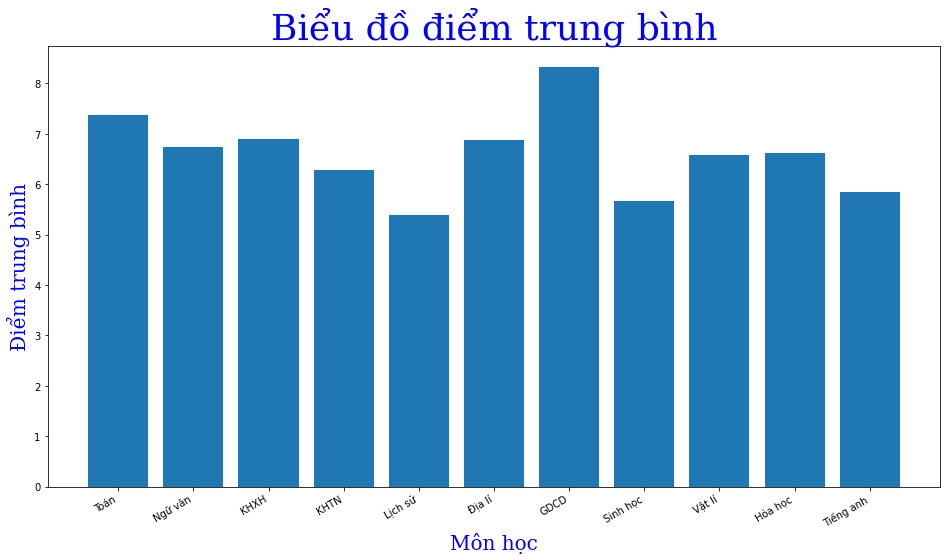

3


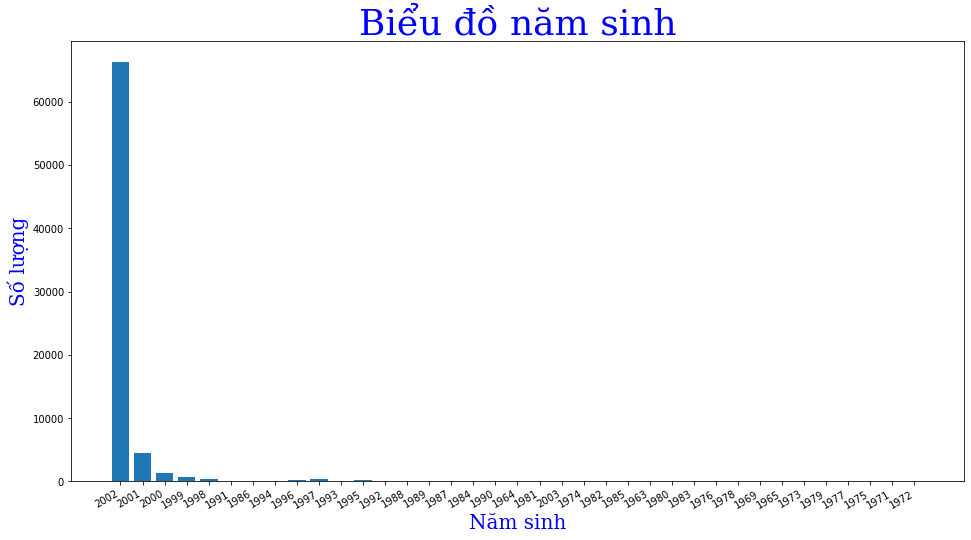

5


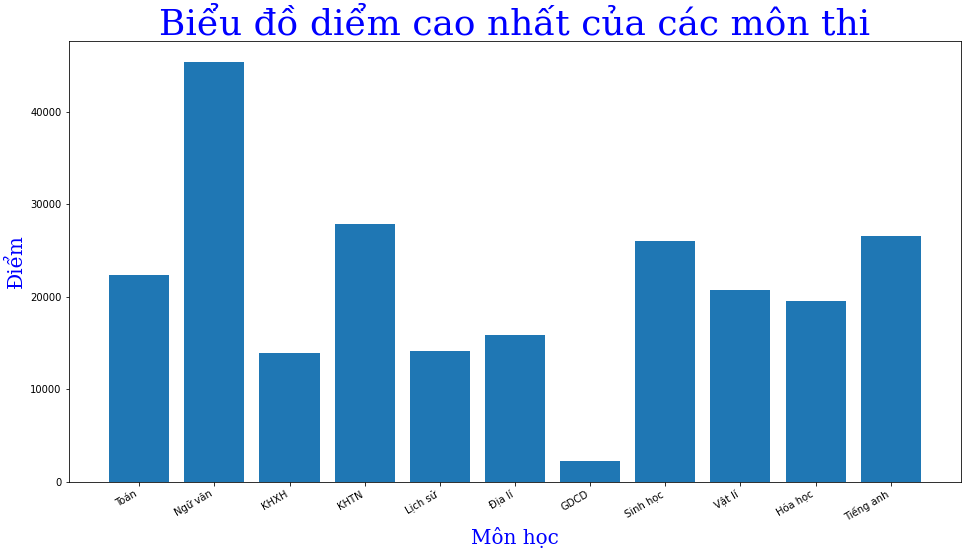

In [4]:
screen = Tk()
screen.geometry('600x350')
bien1 = '0'
so_diem = StringVar()

Label(screen, font='times', width = 50, fg='red', text = "Dữ liệu học sinh").grid(row=0,columnspan=2)

# button 
button1 = Button(screen, text='Tính điểm trung bình', font='times',width = 15, 
                 command=lambda:BT1(diem_cac_mon, ten_mon))
button2 = Button(screen, text='Trực quan hóa', font='times', width = 15, bg='red',
                 command=TrucQuanHoa)
button3 = Button(screen, text='Năm sinh', font='times', width = 15,
                 command=lambda:BT3(ngay_sinh))
button4 = Button(screen, text='HS không thi', font='times', width = 15,
                 command=lambda:BT4(diem_cac_mon, ten_mon))
button5 = Button(screen, text='Điểm min:max', font='times', width=15,
                 command=lambda:BT5(diem_cac_mon, ten_mon))
entry5 = Entry(screen, textvariable=so_diem)

button1.grid(row=1, column=0)
button2.grid(row=11, columnspan=2)
button3.grid(row=1, column=1)
button4.grid(row=2, column=1)
button5.grid(row=3, column=0)
entry5.grid(row=3, column=1)


# text để hiện thị kết quả tính toán
tex = Text(master=screen, height=8, width=73)
scr=Scrollbar(screen, orient=VERTICAL, command=tex.yview)
scr.grid(row=4, column=2, rowspan=5, columnspan=1, sticky=NS,)
tex.grid(row=5, columnspan=3, pady=10)
tex.config(yscrollcommand=scr.set, font=('times', 10), fg='blue')


screen.mainloop()